<a href="https://colab.research.google.com/github/tentao7/Python/blob/master/1224_class02_shery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 22.9MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
# !pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import warnings
import sklearn
import time
import sys
import os

###
randint :Discrete uniform distribution, yielding integers
random_integers: Discrete uniform distribution over the 
              closed interval [low, high].
random_sample : Floats uniformly distributed over [0, 1).
random  : Alias for random_sample.
rand : Convenience function that accepts dimensions as input, e.g., rand(2,2) would generate a 2-by-2 array of floats, uniformly distributed over [0, 1).


In [0]:
def make_wave(n_samples=100):
  rnd = np.random.RandomState(42)
  x = rnd.uniform(-3,10, size=n_samples)  # -3에서 3까지 분포를 갖는 데이타
  y_no_noise = (np.sin(4*x) +  x)          # 
  y = (y_no_noise + rnd.normal(size=len(x))) / 2
  return x.reshape(-1,1),y

In [5]:
X, y = make_wave(10)
print(X.shape, y.shape)
print(X.dtype, y.dtype)
print(X.size, y.size)
print(X.ndim, y.ndim)

(10, 1) (10,)
float64 float64
10 10
2 1


w[0]: 0.393906  b: -0.031804


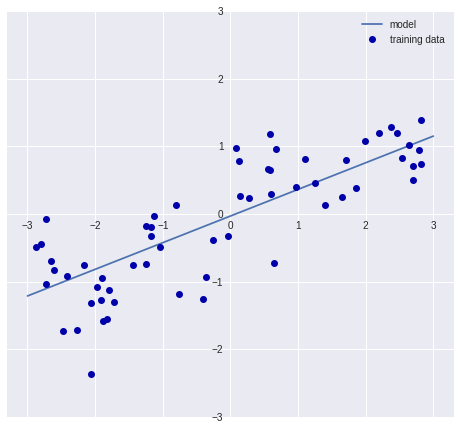

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = make_wave(60)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape,X_test.shape)

(45, 1) (15, 1)


In [8]:
lr=LinearRegression()  # 선형 회귀 모델 
lr.fit(X_train,y_train)  # 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
lr.predict(X_test)   # 예측 


array([-0.20098962, -0.77734642,  2.05228987, -0.36035166,  2.9015353 ,
        2.38825589, -0.19123546,  3.46286962, -0.09076768,  3.1964737 ,
        1.34357894,  0.98908595,  0.55497486, -0.92210127,  0.68520031])

In [10]:
print("훈련 데이터 세트 점수 : {:.3f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.3f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.917
테스트 데이터 세트 점수 : 0.848


###Ridge, Lasso


In [31]:
!pip install Ridge

  Running setup.py bdist_wheel for Ridge ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/39/17/de/36b2fc1dca30d30db6df3879a4a7e649f9495a93dca1a6ebb4
Successfully built Ridge


In [0]:

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import matplotlib.pyplot as plt


In [33]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "./malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

FileNotFoundError: ignored

### 새 섹션

In [0]:
def load_extended_boston():
    boston = load_boston()  # 데이터 셋 불러오기
    X = boston.data         # 입력 데이터 
    
    X = MinMaxScaler().fit_transform(boston.data)  # 입력 데이터 정규화
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [35]:
X, y = load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [36]:
y[1:5]

array([21.6, 34.7, 33.4, 36.2])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))


훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [39]:
#from sklearn.datasets import Ridge
#상기의 명령이 실행 되면 에러가 나오는 이유는? 
ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수:{:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(ridge.score(X_test, y_test)))


훈련 세트 점수:0.87
테스트 세트 점수:0.81


In [43]:
##linear_model.Ridge
##from sklearn.linear_model import Ridge  
## 계수를 0에 가깝게 만들어 제약, 과적합 해결 
ridge5=Ridge(alpha=5).fit(X_train, y_train)
print('훈련 세트 점수:{:.2f}'.format(ridge5.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(ridge5.score(X_test, y_test)))


훈련 세트 점수:0.80
테스트 세트 점수:0.76


In [44]:
rigde05 = Ridge(alpha=0.5).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(rigde05.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(rigde05.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.82


In [45]:
rigde01 = Ridge(alpha=0.3).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(rigde01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(rigde01.score(X_test, y_test)))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.83


In [47]:
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(rigde01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(rigde01.score(X_test, y_test)))

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.78


In [0]:
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

In [52]:
lr.coef_

array([-5.11126504e+02,  4.02559787e+00, -9.45778613e+01,  1.34720251e+01,
        3.48176257e+01,  6.03611391e+01,  3.49707471e+01,  2.94114542e+00,
        3.14525465e+00,  8.20792132e+01,  1.24254396e+01,  3.86676075e+01,
       -9.38409521e-01,  1.32936334e+01,  7.60317098e+02,  1.42274855e+03,
        2.29220565e+02, -7.79405429e+01,  8.79429261e+01,  1.39813973e+01,
        1.02565346e+02,  7.52178879e+02, -1.82071934e+03,  5.34143172e+02,
       -2.41122305e+01,  1.11848898e+02, -4.38177813e+00, -1.23079894e+01,
       -3.63360790e+00, -5.64878037e+01,  4.60395879e-01,  8.18005986e+00,
       -2.06294404e+01, -3.49659791e+01,  4.31717988e+01, -2.92220843e+00,
        1.45250942e+01, -3.24346333e+01,  3.66984591e+01, -2.75859278e+00,
        6.27805740e+00,  4.98379104e+01,  6.55060318e+00,  3.91047481e+01,
       -1.14826290e+01, -8.00990322e-01, -3.68662287e+00,  3.36483260e+01,
       -1.49103502e+01,  1.34720251e+01, -1.80244019e+01, -2.90956806e+01,
       -2.78115796e+00, -

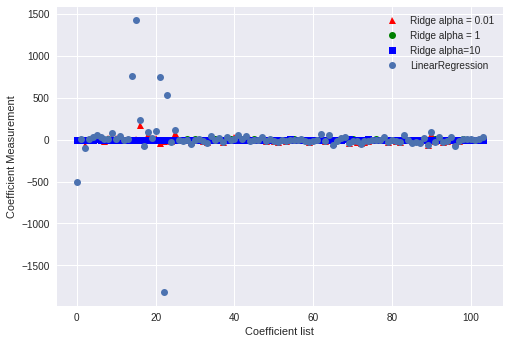

In [53]:
plt.plot(ridge0001.coef_,'r^',label = 'Ridge alpha = 0.01') # 삼각형 
plt.plot(ridge1.coef_,'go',label = 'Ridge alpha = 1')  # 작은원
plt.plot(ridge10.coef_,'bs',label ='Ridge alpha=10')    # 네모
plt.plot(lr.coef_,'o',label = 'LinearRegression')       #원

plt.xlabel('Coefficient list')
plt.ylabel('Coefficient Measurement')
plt.legend()

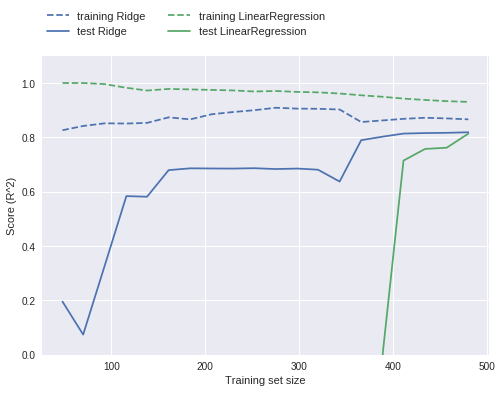

In [54]:
import mglearn
mglearn.plots.plot_ridge_n_samples()